**NOTA: ADJUNTO UN POWERPOINT EN EL QUE DETALLO LOS PARÁMETROS Y PRUEBAS DE MODELADO EFECTUADAS EN LAS DOS TIENDAS.**

<font color="#CA0032"><h1 align="left">**Redes recurrentes profundas**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Predicción de series temporales**</h1></font>

<h2 align="left">Manuel Sánchez-Montañés</h2>

<font color="#6E6E6E"><h2 align="left">manuel.smontanes@gmail.com</h2></font>

**Notebook: Manuel Sánchez-Montañés**

### **Usaremos un esquema many to one:**

<img src="https://drive.google.com/uc?export=download&id=1iokh576AiK2iFhftPogSBsNXixAi-LBg" align="center" style="float" width="500">

In [ ]:
COLAB = True

In [ ]:
if COLAB:
    !pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <font color="#CA3532"> **1. Importar librerías**

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.regularizers import L1, L2, L1L2

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import os

%matplotlib inline
# fijo la semilla aleatoria por reproducibilidad
np.random.seed(7)

## <font color="#CA3532"> **2. Carga de datos**

In [ ]:
!ls

datos_tienda1.csv  model_current_best.h5	      __pycache__
datos_tienda2.csv  my_utils_series_temporales.py      sample_data
__MACOSX	   my_utils_series_temporales.py.zip


In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    # Tienda 1:
    gdd.download_file_from_google_drive(file_id='1lHJP1itKOKs4sQwrNENhi1vD-GcJXcVr',
                                        dest_path='./datos_tienda1.csv')
    # Tienda 2:
    gdd.download_file_from_google_drive(file_id='1J2NzWW0JxMEiuz_h4_TGXTHf1kphrICq',
                                        dest_path='./datos_tienda2.csv')

#data = pd.read_csv('datos_tienda1.csv')
data = pd.read_csv('datos_tienda2.csv')
data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,85,2,2013-01-01,4220.0,619.0,1,0,1,0,1,0,0
1,85,3,2013-01-02,6069.0,914.0,1,0,1,1,0,0,0
2,85,4,2013-01-03,5246.0,820.0,1,0,1,1,0,0,0
3,85,5,2013-01-04,5339.0,805.0,1,0,1,1,0,0,0
4,85,6,2013-01-05,5774.0,772.0,1,0,0,1,0,0,0
5,85,7,2013-01-06,10509.0,1509.0,1,0,0,1,0,0,0
6,85,1,2013-01-07,8990.0,1119.0,1,1,0,1,0,0,0
7,85,2,2013-01-08,7300.0,914.0,1,1,0,1,0,0,0
8,85,3,2013-01-09,6523.0,891.0,1,1,0,1,0,0,0
9,85,4,2013-01-10,7434.0,946.0,1,1,0,1,0,0,0


In [ ]:
!ls -la

total 184
drwxr-xr-x 1 root root  4096 Nov 28 14:39 .
drwxr-xr-x 1 root root  4096 Nov 28 14:38 ..
drwxr-xr-x 4 root root  4096 Nov 22 00:13 .config
-rw-r--r-- 1 root root 36366 Nov 28 14:39 datos_tienda1.csv
-rw-r--r-- 1 root root 38421 Nov 28 14:39 datos_tienda2.csv
drwxr-xr-x 2 root root  4096 Nov 28 14:39 __MACOSX
-rw-r--r-- 1 root root 73040 Nov 28 15:16 model_current_best.h5
-rw-r--r-- 1 root root  4167 Nov 28 14:39 my_utils_series_temporales.py
-rw-r--r-- 1 root root  1994 Nov 28 14:39 my_utils_series_temporales.py.zip
drwxr-xr-x 2 root root  4096 Nov 28 14:39 __pycache__
drwxr-xr-x 1 root root  4096 Nov 22 00:14 sample_data


In [ ]:
data.shape

(881, 12)

## <font color="#CA3532"> **3. Preprocesado inicial y visualización de datos**

In [ ]:
type(data['Date'][0])

str

In [ ]:
# La fecha es un string, la pasamos a formato fecha de pandas:
data['Date'] = pd.to_datetime(data['Date'])
type(data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data['Date']

0     2013-01-01
1     2013-01-02
2     2013-01-03
3     2013-01-04
4     2013-01-05
         ...    
876   2015-05-27
877   2015-05-28
878   2015-05-29
879   2015-05-30
880   2015-05-31
Name: Date, Length: 881, dtype: datetime64[ns]

In [ ]:
data["Date"][0].month

1

- **Se establece una nueva variable "parte_mes" que secciona los meses en 3 tramos (inicios - 1, mediados - 2 y finales - 3).**

In [ ]:
fechas      = data['Date'].values

# variable endógena:
target      = data['Sales'].values
#target      = data['Customers'].values

# variables exógenas:
data = data.assign(seccion_mes = lambda x: x.Date.dt.day.map(lambda value : 1 if value < 11 else 2 if value < 21 else 3))
parte_mes   = data['seccion_mes'].values
mes         = [x.month for x in data['Date']] 
day_of_week = data['DayOfWeek'].values
open_       = data['Open'].values
promo       = data['Promo'].values
festivo1    = data['SchoolHoliday'].values  
festivo2    = data['StateHoliday_0'].values
festivo3    = data['StateHoliday_a'].values
festivo4    = data['StateHoliday_b'].values
festivo5    = data['StateHoliday_c'].values

In [ ]:
day_of_week

array([2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2,
       3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3,
       4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4,
       5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5,
       6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6,
       7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7,
       1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1,
       2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2,
       3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3,
       4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4,
       5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5,
       6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6,
       7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7,
       1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1,

- **En las siguientes visualizaciones podemos observar aumentos muy pronunciados recurrentes, que seguramente están vinculados con las ventas en festivos.**

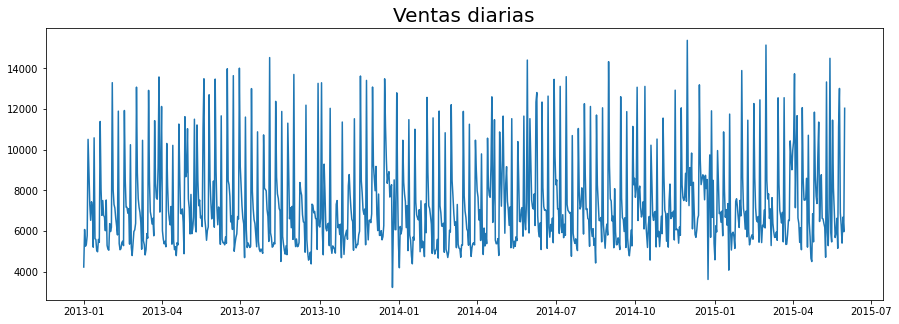

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, target)
plt.title('Ventas diarias',
          fontsize=20);

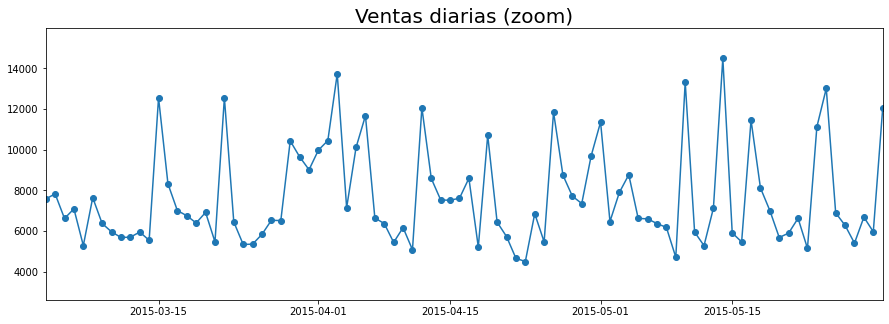

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, target, 'o-')
plt.title('Ventas diarias (zoom)', fontsize=20)
plt.xlim([fechas[-90],fechas[-1]]);

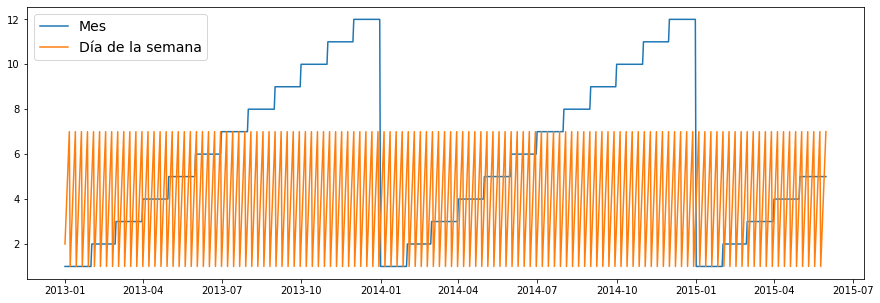

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas, mes, label='Mes')
plt.plot(fechas, day_of_week, label='Día de la semana')
plt.legend(fontsize=14);

Media ventas diarias    : 7260.399545970488


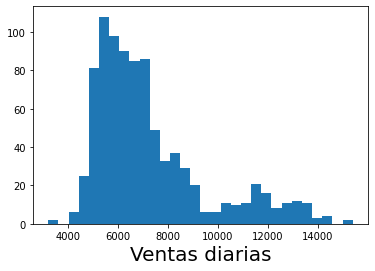

In [ ]:
plt.hist(target, bins=30)
plt.xlabel('Ventas diarias', fontsize=20)
print("Media ventas diarias    :", target.mean())

- **En los valores más bajos, observamos una acumulación de varios sumatorios de ventas.**

## <font color="#CA3532"> **4. Transformación de la variable a predecir**

- **El cambio del factor de transformación de 5000 a 10000 ha resultado ser provechoso para la tienda 2.**

In [ ]:
# Transformación de escala (ajustar el factor en función del problema)
def transform(x):
    return x/10000
def inverse_transform(x_escalado):
    return x_escalado*10000

In [ ]:
transform(np.array([1,2,3]))

array([0.0001, 0.0002, 0.0003])

## <font color="#CA3532"> **5. Enventanado de datos**

In [ ]:
if COLAB:
    gdd.download_file_from_google_drive(file_id='1OY7Jhzz0QpbTXaOVZjMXL34drUrXQD0E',
                                        dest_path='./my_utils_series_temporales.py.zip', unzip=True)

from my_utils_series_temporales import NAN

In [ ]:
from my_utils_series_temporales import (int2dummy, enventanar,
                                        info_enventanado)


In [ ]:
#?int2dummy

In [ ]:
# en int2dummy el máximo marcado como entrada es un valor legal
one_hot_mes = int2dummy(mes, 1, 12)
one_hot_parte_mes = int2dummy(parte_mes, 1, 3)
one_hot_day_of_week = int2dummy(day_of_week, 1, 7)

In [ ]:
len(mes)

881

In [ ]:
one_hot_mes

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
one_hot_mes.shape

(881, 12)

In [ ]:
print(one_hot_day_of_week.shape, one_hot_parte_mes.shape, one_hot_mes.shape)

(881, 7) (881, 3) (881, 12)


- **Aprovecho las variables de entrada que indican las festividades, ya que justamente en esta tienda sí contamos con las ventas en festivos.**

- **A través del método one_hot transformo la variable "parte_mes" y obtengo las correspodientes dummies de cada valor. Con el objetivo de optimizar el entrenamiento de mi modelo.**

In [ ]:
target_transf = transform(target)

series = [target_transf, promo, open_, festivo1, festivo2, festivo3, festivo4, festivo5]
       
se_saben_antes = [False, True, True, True, True, True, True, True]

nombres_series = ["target_transf", "promo", "open_", "festivo1", "festivo2", "festivo3", "festivo4", "festivo5"]

# Variables calendario sobre las que hemos hecho one-hot encoding
for i in range(one_hot_mes.shape[1]):
    series.append(one_hot_mes[:,i])
    nombres_series.append("mes"+str(i+1))
    se_saben_antes.append(True)

for i in range(one_hot_parte_mes.shape[1]):
    series.append(one_hot_parte_mes[:,i])
    nombres_series.append("parte_mes"+str(i+1))
    se_saben_antes.append(True)

for i in range(one_hot_day_of_week.shape[1]):
    series.append(one_hot_day_of_week[:,i])
    nombres_series.append("day"+str(i+1))
    se_saben_antes.append(True)

In [ ]:
print(np.shape(series))
print(np.shape(se_saben_antes))

(30, 881)
(30,)


- **Una ventana de 5 días ha resultado ser el valor más estable para ambas tiendas.**

In [ ]:
lookback = 5 # lookback es otro sinónimo de W_in

# target=0 en siguiente línea quiere decir cuál es el índice del target en objeto "series":
X, y = enventanar(series, target=0, se_saben_antes=se_saben_antes,
                  W_in=lookback)

print(X.shape, np.shape(y))

(881, 5, 30) (881,)


In [ ]:
info_enventanado(X[:10],y[:10],
                 nombres_series=nombres_series,
                 nombre_target="target",
                 tiempos=fechas)

10 ventanas creadas

X.shape=(10, 5, 30)  Y.shape=(10,) 

 Ventana 0: 


,?0,?1,?2,?3,?4
target_transf,nan,nan,nan,nan,nan
promo,nan,nan,nan,nan,0.000000
open_,nan,nan,nan,nan,1.000000
festivo1,nan,nan,nan,nan,1.000000
festivo2,nan,nan,nan,nan,0.000000
festivo3,nan,nan,nan,nan,1.000000
festivo4,nan,nan,nan,nan,0.000000
festivo5,nan,nan,nan,nan,0.000000
mes1,nan,nan,nan,nan,1.000000
mes2,nan,nan,nan,nan,0.000000


 Ventana 1: 


,?0,?1,?2,?3,2013-01-01T00:00:00.000000000
target_transf,nan,nan,nan,nan,0.422000
promo,nan,nan,nan,0.000000,0.000000
open_,nan,nan,nan,1.000000,1.000000
festivo1,nan,nan,nan,1.000000,1.000000
festivo2,nan,nan,nan,0.000000,1.000000
festivo3,nan,nan,nan,1.000000,0.000000
festivo4,nan,nan,nan,0.000000,0.000000
festivo5,nan,nan,nan,0.000000,0.000000
mes1,nan,nan,nan,1.000000,1.000000
mes2,nan,nan,nan,0.000000,0.000000


 Ventana 2: 


,?0,?1,?2,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000
target_transf,nan,nan,nan,0.422000,0.606900
promo,nan,nan,0.000000,0.000000,0.000000
open_,nan,nan,1.000000,1.000000,1.000000
festivo1,nan,nan,1.000000,1.000000,1.000000
festivo2,nan,nan,0.000000,1.000000,1.000000
festivo3,nan,nan,1.000000,0.000000,0.000000
festivo4,nan,nan,0.000000,0.000000,0.000000
festivo5,nan,nan,0.000000,0.000000,0.000000
mes1,nan,nan,1.000000,1.000000,1.000000
mes2,nan,nan,0.000000,0.000000,0.000000


 Ventana 3: 


,?0,?1,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000,2013-01-03T00:00:00.000000000
target_transf,nan,nan,0.422000,0.606900,0.524600
promo,nan,0.000000,0.000000,0.000000,0.000000
open_,nan,1.000000,1.000000,1.000000,1.000000
festivo1,nan,1.000000,1.000000,1.000000,1.000000
festivo2,nan,0.000000,1.000000,1.000000,1.000000
festivo3,nan,1.000000,0.000000,0.000000,0.000000
festivo4,nan,0.000000,0.000000,0.000000,0.000000
festivo5,nan,0.000000,0.000000,0.000000,0.000000
mes1,nan,1.000000,1.000000,1.000000,1.000000
mes2,nan,0.000000,0.000000,0.000000,0.000000


 Ventana 4: 


,?0,2013-01-01T00:00:00.000000000,2013-01-02T00:00:00.000000000,2013-01-03T00:00:00.000000000,2013-01-04T00:00:00.000000000
target_transf,nan,0.422000,0.606900,0.524600,0.533900
promo,0.000000,0.000000,0.000000,0.000000,0.000000
open_,1.000000,1.000000,1.000000,1.000000,1.000000
festivo1,1.000000,1.000000,1.000000,1.000000,0.000000
festivo2,0.000000,1.000000,1.000000,1.000000,1.000000
festivo3,1.000000,0.000000,0.000000,0.000000,0.000000
festivo4,0.000000,0.000000,0.000000,0.000000,0.000000
festivo5,0.000000,0.000000,0.000000,0.000000,0.000000
mes1,1.000000,1.000000,1.000000,1.000000,1.000000
mes2,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 5: 


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00
target_transf,0.422000,0.606900,0.524600,0.533900,0.577400
promo,0.000000,0.000000,0.000000,0.000000,0.000000
open_,1.000000,1.000000,1.000000,1.000000,1.000000
festivo1,1.000000,1.000000,1.000000,0.000000,0.000000
festivo2,1.000000,1.000000,1.000000,1.000000,1.000000
festivo3,0.000000,0.000000,0.000000,0.000000,0.000000
festivo4,0.000000,0.000000,0.000000,0.000000,0.000000
festivo5,0.000000,0.000000,0.000000,0.000000,0.000000
mes1,1.000000,1.000000,1.000000,1.000000,1.000000
mes2,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 6: 


,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
target_transf,0.606900,0.524600,0.533900,0.577400,1.050900
promo,0.000000,0.000000,0.000000,0.000000,1.000000
open_,1.000000,1.000000,1.000000,1.000000,1.000000
festivo1,1.000000,1.000000,0.000000,0.000000,0.000000
festivo2,1.000000,1.000000,1.000000,1.000000,1.000000
festivo3,0.000000,0.000000,0.000000,0.000000,0.000000
festivo4,0.000000,0.000000,0.000000,0.000000,0.000000
festivo5,0.000000,0.000000,0.000000,0.000000,0.000000
mes1,1.000000,1.000000,1.000000,1.000000,1.000000
mes2,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 7: 


,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00
target_transf,0.524600,0.533900,0.577400,1.050900,0.899000
promo,0.000000,0.000000,0.000000,1.000000,1.000000
open_,1.000000,1.000000,1.000000,1.000000,1.000000
festivo1,1.000000,0.000000,0.000000,0.000000,0.000000
festivo2,1.000000,1.000000,1.000000,1.000000,1.000000
festivo3,0.000000,0.000000,0.000000,0.000000,0.000000
festivo4,0.000000,0.000000,0.000000,0.000000,0.000000
festivo5,0.000000,0.000000,0.000000,0.000000,0.000000
mes1,1.000000,1.000000,1.000000,1.000000,1.000000
mes2,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 8: 


,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00
target_transf,0.533900,0.577400,1.050900,0.899000,0.730000
promo,0.000000,0.000000,1.000000,1.000000,1.000000
open_,1.000000,1.000000,1.000000,1.000000,1.000000
festivo1,0.000000,0.000000,0.000000,0.000000,0.000000
festivo2,1.000000,1.000000,1.000000,1.000000,1.000000
festivo3,0.000000,0.000000,0.000000,0.000000,0.000000
festivo4,0.000000,0.000000,0.000000,0.000000,0.000000
festivo5,0.000000,0.000000,0.000000,0.000000,0.000000
mes1,1.000000,1.000000,1.000000,1.000000,1.000000
mes2,0.000000,0.000000,0.000000,0.000000,0.000000


 Ventana 9: 


,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00
target_transf,0.577400,1.050900,0.899000,0.730000,0.652300
promo,0.000000,1.000000,1.000000,1.000000,1.000000
open_,1.000000,1.000000,1.000000,1.000000,1.000000
festivo1,0.000000,0.000000,0.000000,0.000000,0.000000
festivo2,1.000000,1.000000,1.000000,1.000000,1.000000
festivo3,0.000000,0.000000,0.000000,0.000000,0.000000
festivo4,0.000000,0.000000,0.000000,0.000000,0.000000
festivo5,0.000000,0.000000,0.000000,0.000000,0.000000
mes1,1.000000,1.000000,1.000000,1.000000,1.000000
mes2,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print(X.shape)
print(np.shape(target))

(881, 5, 30)
(881,)


## <font color="#CA3532"> **6. Separación training-test**

In [ ]:
train_perc  = .8
punto_corte = int(len(X)*train_perc)

In [ ]:
X_train      = X[lookback:punto_corte]      # elimino los lookback primeros al tener NANs
y_train      = y[lookback:punto_corte]      # elimino los lookback primeros al tener NANs
target_train = target[lookback:punto_corte] # elimino los lookback primeros al tener NANs
fechas_train = fechas[lookback:punto_corte] # elimino los lookback primeros al tener NANs

X_test       = X[punto_corte:]
y_test       = y[punto_corte:]
target_test  = target[punto_corte:]
fechas_test  = fechas[punto_corte:]

print(np.shape(target_train))
print(np.shape(target_test))

(699,)
(177,)


In [ ]:
print(X_train.shape, y_train.shape)

(699, 5, 30) (699,)


## <font color="#CA3532"> **7. Construcción del modelo con Keras**

- **Los regularizadores L1 o L2 empeoran sutilmente el sobreajuste.**

- **El optimizador RMSprop ajustado en LR=0.005 ha demostrado ser más eficiente que cualquier opción de Adam.**

In [ ]:
model = Sequential()

model.add(LSTM(25, input_shape=(lookback, X_train.shape[2])
                )
        ) 

model.add(Dense(1, 
               )
         )

model.compile(loss='mean_absolute_error',
              optimizer=optimizers.RMSprop(learning_rate=0.005),
              metrics=['mse']) 

import keras.backend as K
print(K.get_value(model.optimizer.lr))

0.005


In [ ]:
model.optimizer.lr

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25)                5600      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 5,626
Trainable params: 5,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def grafica_entrenamiento(tr_mse, val_mse):
    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_mse)), tr_mse)
    plt.plot(1+np.arange(len(val_mse)), val_mse)
    plt.title('mse del modelo', fontsize=18)
    plt.xlabel('epoca', fontsize=18)
    plt.ylabel('mse', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

- **Los valores de épocas (200) y tamaño de lote (20) han demostrado ser los más efectivos, con menor sobreajuste y más estables para nuestro modelo.**


Epoch 1: val_mse improved from inf to 0.03336, saving model to model_current_best.h5

Epoch 1: val_mse improved from 0.03336 to 0.01684, saving model to model_current_best.h5

Epoch 1: val_mse did not improve from 0.01684

Epoch 1: val_mse improved from 0.01684 to 0.01196, saving model to model_current_best.h5

Epoch 1: val_mse did not improve from 0.01196

Epoch 1: val_mse improved from 0.01196 to 0.01038, saving model to model_current_best.h5

Epoch 1: val_mse improved from 0.01038 to 0.00921, saving model to model_current_best.h5

Epoch 1: val_mse did not improve from 0.00921

Epoch 1: val_mse improved from 0.00921 to 0.00913, saving model to model_current_best.h5

Epoch 1: val_mse did not improve from 0.00913

Epoch 1: val_mse improved from 0.00913 to 0.00842, saving model to model_current_best.h5

Epoch 1: val_mse did not improve from 0.00842

Epoch 1: val_mse improved from 0.00842 to 0.00810, saving model to model_current_best.h5

Epoch 1: val_mse did not improve from 0.00810

E

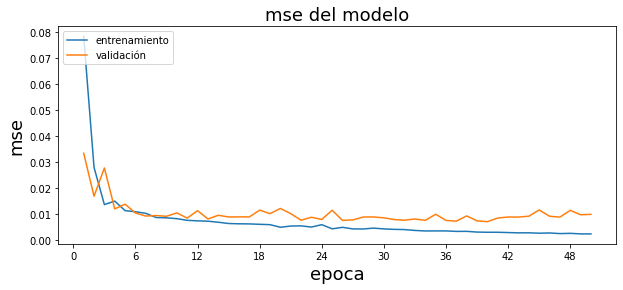


Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val

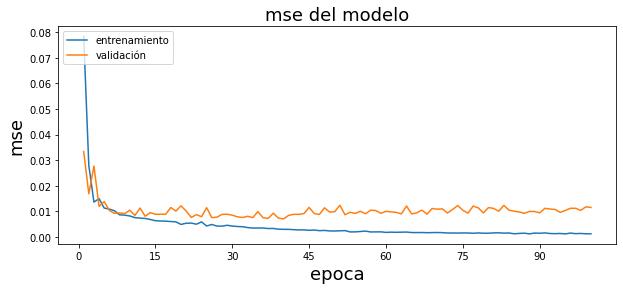


Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val

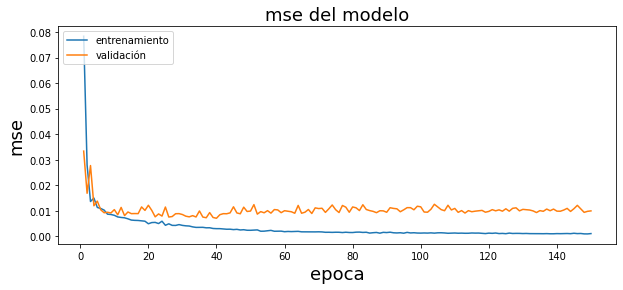


Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val_mse did not improve from 0.00705

Epoch 1: val

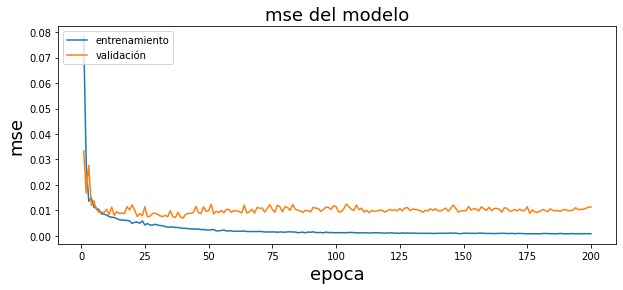

In [ ]:
epochs = 200
batch_size = 20
Nval = 200
control_sobreajuste_val = True

if not control_sobreajuste_val:
    history = model.fit(X_train, y_train, epochs=epochs,
                        batch_size=batch_size, verbose=2)
else:    
    acum_tr_mse = []
    acum_val_mse = []
    modelpath="model_current_best.h5"
    checkpoint = ModelCheckpoint(modelpath, monitor='val_mse', verbose=2, # val_mean_squared_error
                                 save_best_only=True,
                                 mode='min') # graba sólo los que mejoran en validación

    callbacks_list = [checkpoint]
    
    for e in range(epochs):
        aux = X_train[:-Nval]
        history = model.fit(aux, y_train[:-Nval],
                            batch_size=batch_size,
                            epochs=1,
                            callbacks=callbacks_list,
                            verbose=0,
                            validation_data=(X_train[-Nval:], y_train[-Nval:]))
        
        acum_tr_mse  += history.history['mse'] # mean_squared_error
        acum_val_mse += history.history['val_mse'] # val_mean_squared_error
        
        if (e+1)%50 == 0:
            grafica_entrenamiento(acum_tr_mse, acum_val_mse)

In [ ]:
model = load_model(modelpath) # recupero el mejor modelo en validación

## <font color="#CA3532"> **8. Chequeo del modelo (predicción a un día)**

In [ ]:
y_train_prediction = model.predict(X_train).flatten()
y_test_prediction = model.predict(X_test).flatten()

6/6 [==============================] - 0s 3ms/step


In [ ]:
target_train_pred = inverse_transform(y_train_prediction)
target_test_pred  = inverse_transform(y_test_prediction)

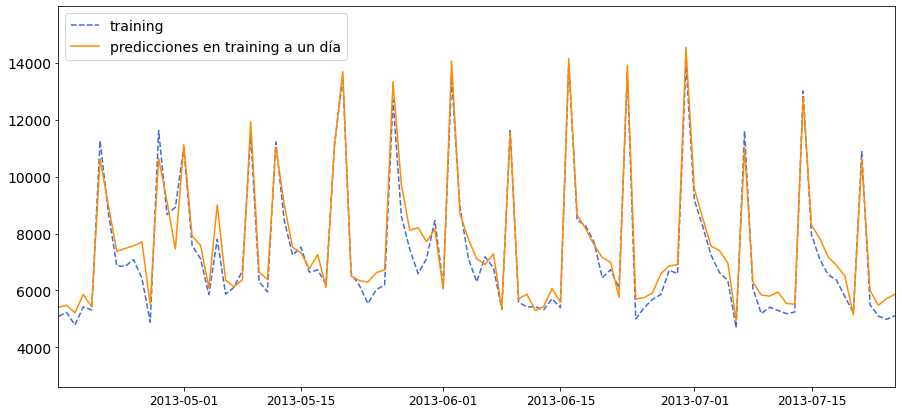

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label="training")
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label="predicciones en training a un día")

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[100],fechas_train[200]])
plt.legend(fontsize=14);

- **En el chequeo del modelo podemos comprobar como el conjunto de training y predicción de training tienen dinámicas muy parecidas. En esta segunda prueba los picos superiores de las predicciones ya son mucho más parecidos a los valores de training.**

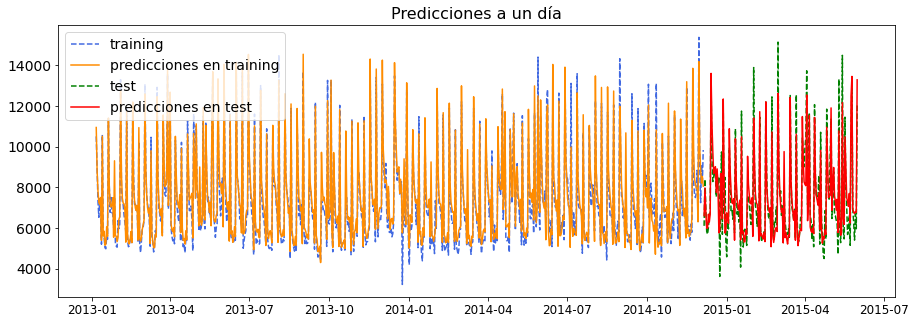

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label='training')
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label='predicciones en training')
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test')
plt.plot(fechas_test, target_test_pred,    c='red',
         label='predicciones en test')
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Predicciones a un día', fontsize=16)
plt.legend(fontsize=14);

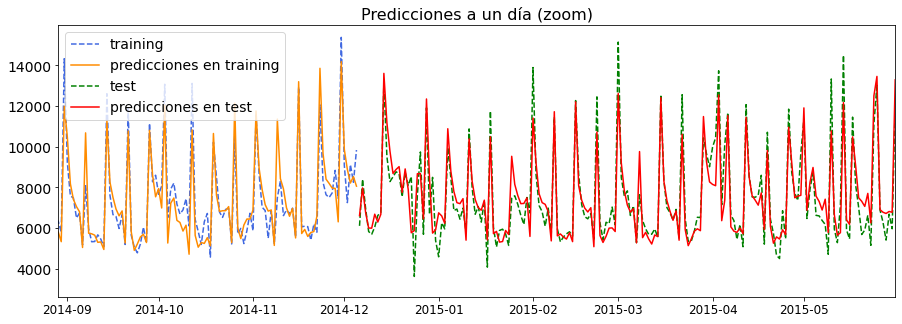

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(fechas_train, target_train, '--', c='royalblue',
         label='training')
plt.plot(fechas_train, target_train_pred,  c='darkorange',
         label='predicciones en training')
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test')
plt.plot(fechas_test, target_test_pred,    c='red',
         label='predicciones en test')
plt.title('Predicciones a un día (zoom)', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlim([fechas_train[600],fechas_test[-1]]);

- **De igual manera en esta segunda prueba, las predicciones a un día en training y test son aún más similares al comportamiento de nuestros conjuntos de datos. Gracias al ajuste del factor de escalado, transformación a dummies de la serie “parte_mes”, aumento de neuronas y ajuste a 0.005 de la tasa de aprendizaje del optimizador RMSprop.**

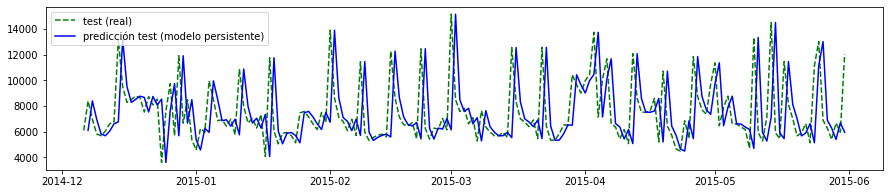

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(fechas_test, target_test, '--',   c='green',
         label='test (real)')
plt.plot(fechas_test[1:], target_test[:-1], '-',   c='blue',
         label='predicción test (modelo persistente)')
plt.legend();

In [ ]:
# Modelos de referencia: modelo persistente (a 1 día, 7 días etc.)

# R2 scores
print("R2 del modelo en training      : ",
      R2_score(target_train[1:], target_train_pred[1:]))
print("R2 del modelo en test          : ",
      R2_score(target_test, target_test_pred))
print("R2 modelo persistente 1 día    : ",
      R2_score(target_test[1:], target_test[:-1]))
print("R2 modelo persistente 1 semana : ",
      R2_score(target_test[7:], target_test[:-7]))
print("R2 modelo persistente 4 semanas: ",
      R2_score(target_test[28:], target_test[:-28]))
print("R2 modelo persistente 1 año: ",
      R2_score(target_train[7*52:], target_train[:-7*52]))

R2 del modelo en training      :  0.917136374006458
R2 del modelo en test          :  0.8331814332127623
R2 modelo persistente 1 día    :  -0.8855262718909758
R2 modelo persistente 1 semana :  -0.15406645715220146
R2 modelo persistente 4 semanas:  0.3382327488119595
R2 modelo persistente 1 año:  0.4293131744224158


- **Obtenemos un mejor R2 Score en test (0,8332) algo menos distanciado del obtenido en training (0,9171). Cabe destacar que en esta segunda tienda contamos con un rango de ventas mayor. Otro factor a tener en cuenta es que disponemos de cifras de venta no nulas para todos los días festivos. Las ventas son menos uniformes y su escala es mayor que en la primera tienda. Estos factores pueden estar disminuyendo la eficacia del modelo.**

In [ ]:
# RMSEs
sqrt = np.sqrt
print("RMSE del modelo en training      : ",
      sqrt(mean_squared_error(target_train[1:],
                              target_train_pred[1:])))
print("RMSE del modelo en test          : ",
      sqrt(mean_squared_error(target_test,
                              target_test_pred)))
print("RMSE modelo persistente 1 día    : ",
      sqrt(mean_squared_error(target_test[1:],
                              target_test[:-1])))
print("RMSE modelo persistente 1 semana : ",
      sqrt(mean_squared_error(target_test[7:],
                              target_test[:-7])))
print("RMSE modelo persistente 4 semanas: ",
      sqrt(mean_squared_error(target_test[28:],
                              target_test[:-28])))

RMSE del modelo en training      :  651.9134043471348
RMSE del modelo en test          :  938.2949417392897
RMSE modelo persistente 1 día    :  3160.0913779581524
RMSE modelo persistente 1 semana :  2501.3301120427436
RMSE modelo persistente 4 semanas:  1906.3703098792903


## <font color="#CA3532"> **9. Predicciones a varios días en test mediante un modelo generativo**

In [ ]:
def step_generativo(model, ventana, X, i):
    # ventana: va a tener dimensiones (1, lookback, n_variables)
    # El target está en (0,:,0)
    # La posición (0,0,0) es el target en el día más antiguo de la ventana
    # La posición (0,0,-1) es el target en el día más reciente de la ventana
    # Las variables calendario están en (0,:,1:)
    # Las variables calendario para el último día de la ventana están en (0,-1,1:)

    z = model.predict(ventana)[0,0] # predicción nueva
    target_pred = inverse_transform(z)
    ventana_nueva = None
    if i < (len(X)-1):
        ventana_nueva = np.zeros(ventana.shape)
        # muevo un día hacia atrás todas las variables de la ventana:
        ventana_nueva[0,:-1,:] = ventana[0,1:,:].copy()

        # introduzco las variables calendario para el último día de la ventana:
        ventana_nueva[0,-1,1:] = X[i+1,-1,1:]

        # meto la predicción como última obervación del target:
        ventana_nueva[0,-1,0] = z
        
        
    return target_pred, ventana_nueva

In [ ]:
def generativo(model, X):
    ventana = np.array([X[0]]).copy()    
    salidas = []
    for i in range(len(X)):
        target_pred, ventana_nueva = step_generativo(model, ventana, X, i)
        salidas.append(target_pred)
        ventana = ventana_nueva
    
    return salidas

In [ ]:
sal = generativo(model, X_test)

1/1 [==============================] - 0s 20ms/step


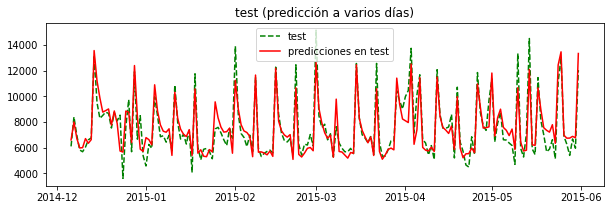

In [ ]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(fechas_test, target_test, '--g', label='test')
plt.plot(fechas_test, sal, 'r', label='predicciones en test')
plt.title('test (predicción a varios días)')
plt.legend();